# Lab 5

## Using `mglearn`

In [1]:
import mglearn

w[0]: 0.393906  b: -0.031804


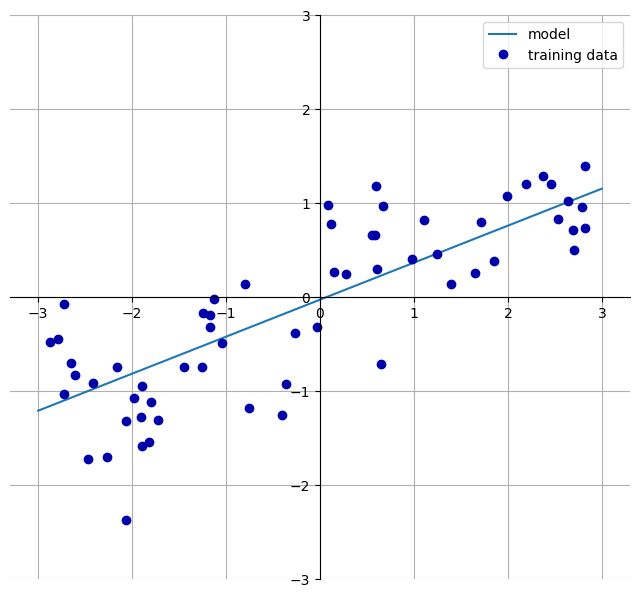

In [2]:
mglearn.plots.plot_linear_regression_wave()

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
lr = LinearRegression().fit(X_train,y_train)

In [4]:
lr.coef_

array([0.39390555])

In [5]:
lr.intercept_

np.float64(-0.031804343026759746)

In [6]:
lr.score(X_train, y_train)

0.6700890315075756

In [7]:
lr.score(X_test, y_test)

0.65933685968637

Making a feature in the wave dataset.

In [8]:
import numpy as np
X_train_ext = np.concatenate((X_train, X_train**2), axis=1)
X_test_ext = np.concatenate((X_test, X_test**2), axis=1)

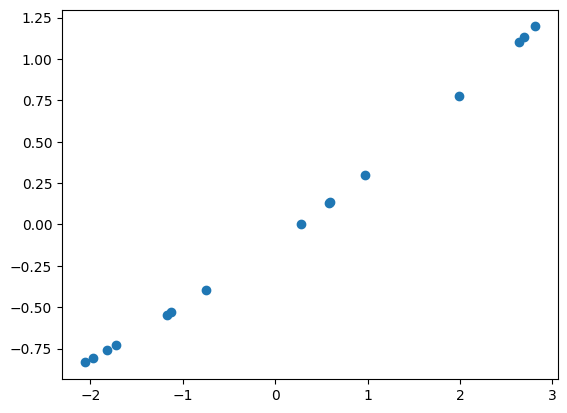

In [9]:
lr = LinearRegression().fit(X_train_ext, y_train)
y_hat = lr.predict(X_test_ext)

%matplotlib inline
import matplotlib.pyplot as plt
plt.scatter(X_test, y_hat)

In [10]:
print(lr.score(X_train_ext,y_train))
print(lr.score(X_test_ext,y_test))

0.6753386938063954
0.6377346604142683


In [11]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()
diabetes.data.shape

(442, 10)

In [12]:
from sklearn.preprocessing import PolynomialFeatures
X = PolynomialFeatures(degree=2, include_bias=False).fit_transform(diabetes.data)
y = diabetes.target
X.shape

(442, 65)

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42)
lr = LinearRegression().fit(X_train, y_train)

In [14]:
print(lr.score(X_train, y_train))
print(lr.score(X_test, y_test))

0.6048153298370549
0.4242419459459559


## Ridge Regression

In [ ]:
from sklearn.linear_model import Ridge
ridge = Ridge().fit(X_train, y_train)
ridge.score(X_train, y_train)

0.42791319284620444

In [16]:
ridge.score(X_test,y_test)

0.43870182398674684

In [ ]:
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
ridge10.score(X_train, y_train)

0.15099790967423465

In [ ]:
ridge10.score(X_test, y_test)

0.15644986167540842

NameError: name 'ridge01' is not defined

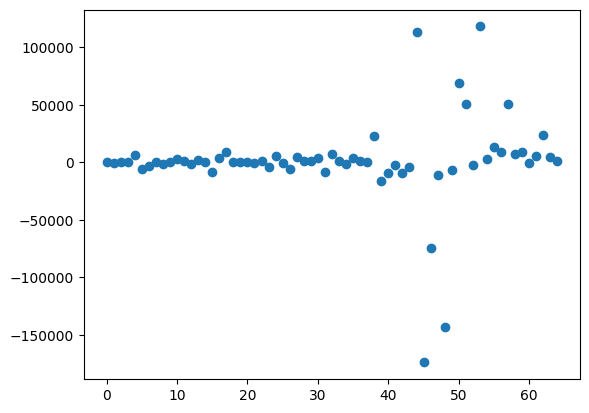

In [ ]:
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)

plt.plot(lr.coef_, 'o', label="Least Squares")
plt.plot(ridge01.coef_, '^', label="Ridge alpha=0.1")
plt.plot(ridge.coef_,'v',label="alpha=1")
plt.plot(ridge10.coef_,'s',label="alpha=10")
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.hlines(0,0,len(lr.coef_))
plt.ylim(-100,100)
plt.legend()